## Importing pandas
 - for data manipulation purpose we use pandas


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loadind the DataSet
- load the csv file into a pandas DataFrame using read_csv()

In [2]:
raw_data = pd.read_csv('./data/IEA_Global_EV_Data_2024.csv')

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [4]:
raw_data.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [5]:
display(raw_data.value_counts().__len__())
display(raw_data.columns)

12654

Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')

### Cleaning the data
 - remove the unwanted rows from `category` like `Projections-APS` & `Projection-STEPS`
 - filtering only the `EV sales` in `parameter` column 

In [6]:
sales = raw_data[raw_data['parameter'] == "EV sales"]
sales = sales[sales['category'] == "Historical"]
print("total rows in sales DF =",sales.value_counts().__len__())


total rows in sales DF = 2501


### Saving the Preprocessed data for duture use

In [7]:
sales.to_csv("data/sales.csv")

### Plotting Bar Chart to visualize the Ev Sales over year 

year
2010    2.606400e+04
2011    1.306080e+05
2012    3.246125e+05
2013    5.535577e+05
2014    8.680802e+05
2015    1.633905e+06
2016    2.186306e+06
2017    3.351445e+06
2018    5.192548e+06
2019    5.557852e+06
2020    8.834555e+06
2021    1.783948e+07
2022    2.618958e+07
2023    3.457247e+07
Name: value, dtype: float64

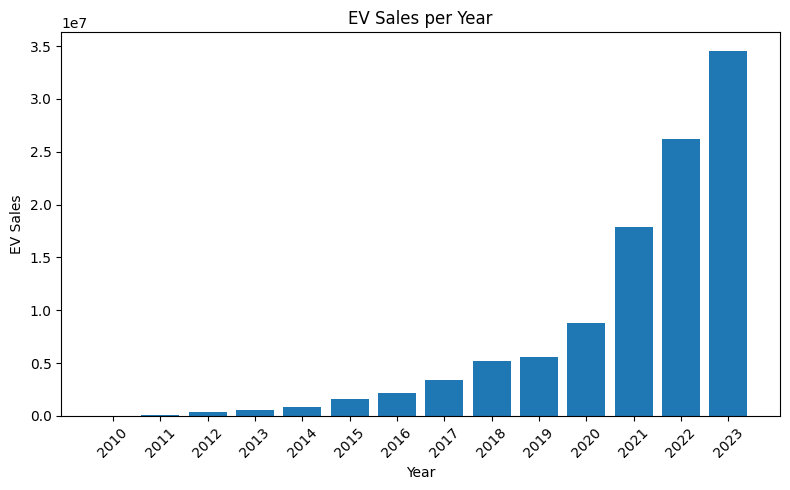

In [8]:
yearly_sales = sales.groupby('year')['value'].sum()
display(yearly_sales)

plt.figure(figsize=(8,5))
plt.bar(yearly_sales.index.astype(str), yearly_sales.values)
plt.xlabel("Year")
plt.ylabel("EV Sales")
plt.title('EV Sales per Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Plotting Sales data on heat map to see which country is apdating EV more

In [16]:
import plotly.express as px

country_sales = sales.groupby('region')['value'].sum().reset_index()
country_sales.columns = ['Country', 'Total EV Sales']

/tmp/ipykernel_679357/1592319106.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




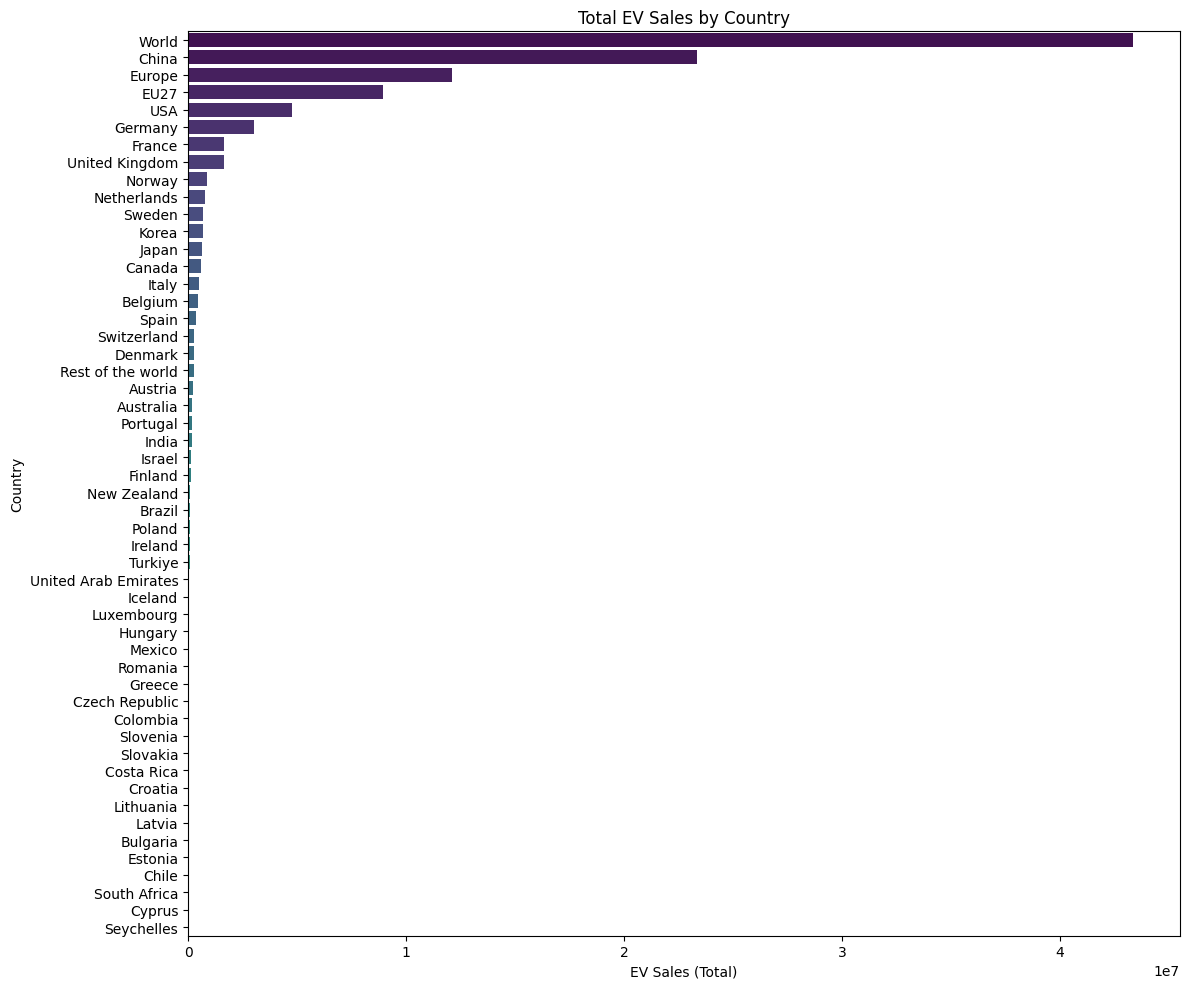

In [17]:
sort = country_sales.sort_values(by='Total EV Sales', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(
    data=sort,
    y='Country',
    x='Total EV Sales',
    palette='viridis'
)
plt.title('Total EV Sales by Country')
plt.xlabel('EV Sales (Total)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [ ]:
fig = px.choropleth(
    country_sales, 
    locations='Country',
    locationmode='country names',
    color='Total EV Sales',
    color_continuous_scale='Viridis',
    title='Global EV Sales by Country'
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()

## Importing Machine Learning Library
- from sci-kit learn, import the train_test_split method for sliptting the dataset into two one for `Training the model` another one for `Testing the model`